In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree , metrics
from sklearn.metrics import mean_squared_error, f1_score, roc_curve, auc, roc_auc_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold,LeaveOneOut, train_test_split #Iteradores de C-V
from sklearn.linear_model import LogisticRegression, LinearRegression

We see the dataframe and an initial view of the data and its fields

In [ ]:
df = pd.read_csv("/content/kag_risk_factors_cervical_cancer.csv")
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


 By looking at the head and tail of the DataFrame, you can identify the presence of undefined data represented with '?'.

In [ ]:
df.tail(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
848,31,3.0,18.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,?,?,0,0,0,0,0,0,0,0
849,32,3.0,18.0,1.0,1.0,11.0,0.16,1.0,6.0,0.0,...,?,?,1,0,1,0,0,0,0,0
850,19,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
851,23,2.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
852,43,3.0,17.0,3.0,0.0,0.0,0.0,1.0,5.0,0.0,...,?,?,0,0,0,0,0,0,0,0
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(858, 36)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

Analized if exist null data and count it

In [ ]:

df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

Because the data type is objects, we change this type to number or NaN, to make it easier to change this data to number, because the model will only receive numeric data.

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

Now in the NaN fields it will be replaced by the median of that column or 1 for categorical variable

In [ ]:
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0) # Under suggestion
df['IUD (years)'] = df['IUD (years)'].fillna(0) #Under suggestion
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())



In [ ]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


Dummy variables are created from categorical to numerical so that the learning algorithm can use them effectively.

In [ ]:
# Se suspende temporalmente los dummies para probar ya que no se ve utilidad
df = pd.get_dummies(data=df, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])
# categorical_columns = ['Smokes','Hormonal Contraceptives','IUD','STDs','Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller']

# # Convertir a dummies y preservar solo la dummy
# df = pd.get_dummies(data=df, columns=categorical_columns, drop_first=True)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
0,18,4.0,15.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
1,15,1.0,14.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
2,34,1.0,17.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
3,52,5.0,16.0,4.0,37.0,37.0,3.00,0.0,0.0,0.0,...,False,True,True,False,True,False,True,False,True,False
4,46,3.0,21.0,4.0,0.0,0.0,15.00,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
854,32,2.0,19.0,1.0,0.0,0.0,8.00,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
855,25,2.0,17.0,0.0,0.0,0.0,0.08,0.0,0.0,0.0,...,True,False,True,False,True,False,False,True,True,False
856,33,2.0,24.0,2.0,0.0,0.0,0.08,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False


In [ ]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Biopsy                                0


we verify the data in the DataFrame again, and indeed the NaN has been replaced with the median of the column as was the case with index 2 in First sexual intercourse

In [ ]:
df.head(13)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
0,18,4.0,15.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
1,15,1.0,14.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
2,34,1.0,17.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
3,52,5.0,16.0,4.0,37.000000,37.0,3.0,0.0,0.0,0.0,...,False,True,True,False,True,False,True,False,True,False
4,46,3.0,21.0,4.0,0.000000,0.0,15.0,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
5,42,3.0,23.0,2.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
6,51,3.0,17.0,6.0,34.000000,3.4,0.0,7.0,0.0,0.0,...,True,False,True,False,False,True,True,False,False,True
7,26,1.0,26.0,3.0,0.000000,0.0,2.0,7.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
8,45,1.0,20.0,5.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,False,True,False,True,True,False,True,False,True,False
9,44,3.0,15.0,2.0,1.266973,2.8,0.0,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False


In [ ]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.201241,0.446278,2.035331,0.444604,0.155012,0.051282,...,0.001166,0.001166,0.0,0.020979,0.001166,0.002331,0.087413,4.177156,3.233100,0.064103
std,8.497948,1.644759,2.791883,1.400981,4.060623,2.210351,3.567040,1.814218,0.529617,0.220701,...,0.034139,0.034139,0.0,0.143398,0.034139,0.048252,0.302545,1.785156,1.818927,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000


Data visualization, we create a copy of the df

In [ ]:
df_data = df

<Axes: xlabel='STDs (number)', ylabel='count'>

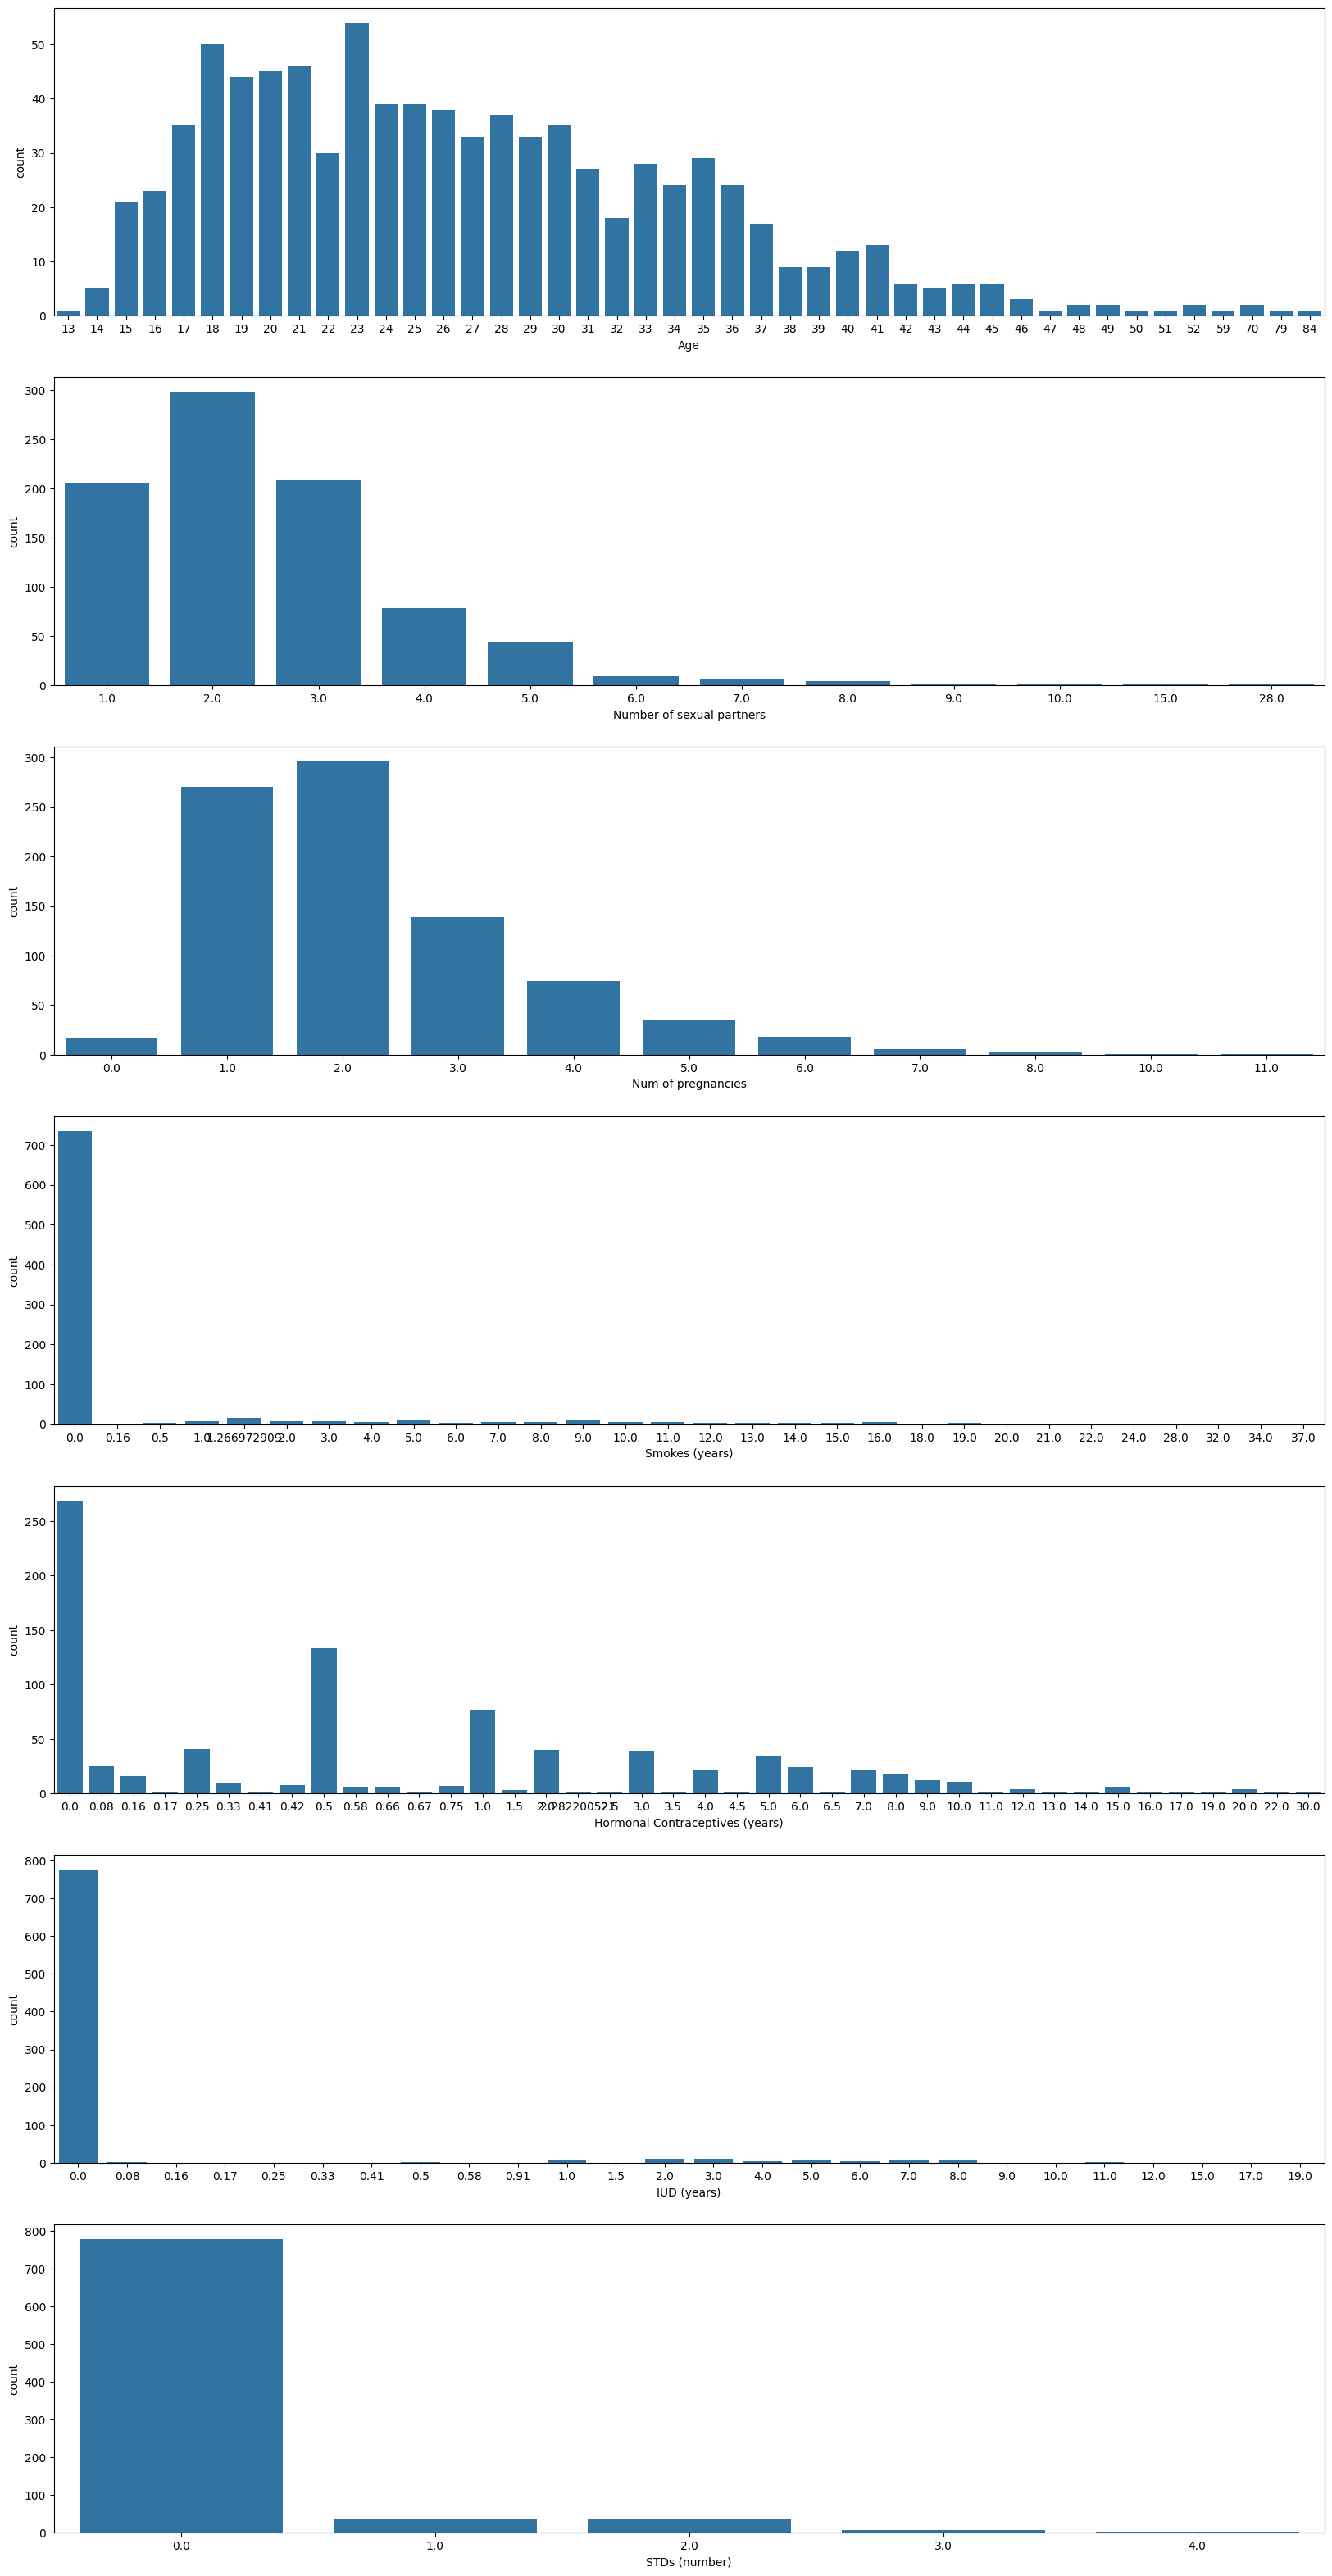

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Number of sexual partners', data=df, ax=ax2)
sns.countplot(x='Num of pregnancies', data=df, ax=ax3)
sns.countplot(x='Smokes (years)', data=df, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=df, ax=ax5)
sns.countplot(x='IUD (years)', data=df, ax=ax6)
sns.countplot(x='STDs (number)', data=df, ax=ax7)

Test set

In [ ]:
rng = np.random.default_rng(seed=42)
#np.random.seed(42)
df_data_shuffle = df_data.iloc[rng.permutation(len(df_data))]

df_train = df_data_shuffle.iloc[1:686, :]
df_test = df_data_shuffle.iloc[686: , :]
df_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
219,23,4.0,18.0,1.0,4.0,0.513202,2.00,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
462,17,5.0,15.0,1.0,0.0,0.000000,0.00,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
354,45,2.0,18.0,4.0,0.0,0.000000,0.00,0.0,0.0,0.0,...,True,False,True,False,True,False,False,True,False,True
696,19,2.0,16.0,2.0,1.0,0.040000,0.50,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
36,39,2.0,17.0,4.0,0.0,0.000000,1.00,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,31,2.0,18.0,2.0,0.0,0.000000,0.00,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
499,32,2.0,17.0,5.0,0.0,0.000000,0.33,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
323,22,2.0,18.0,2.0,0.0,0.000000,3.00,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
93,33,1.0,29.0,2.0,0.0,0.000000,0.50,0.0,0.0,0.0,...,True,False,True,False,True,False,False,True,False,True


Another kind to select the variables

In [ ]:
# labels = df_data.pop('Biopsy')
# df_train_feature,df_test_feature,train_label,test_label = train_test_split(df_data, labels, test_size=0.2, random_state=42)
# df_train_feature.head(7)

training variables


In [ ]:
df_train_feature = df_train[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
       'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]

train_label = np.array(df_train['Biopsy'])

df_test_feature = df_test[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
       'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]

test_label = np.array(df_test['Biopsy'])

In [ ]:
df_train_feature.head(7)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
219,23,4.0,18.0,1.0,4.0,0.513202,2.0,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
462,17,5.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
354,45,2.0,18.0,4.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,True,False,True,False,True,False,False,True,False,True
696,19,2.0,16.0,2.0,1.0,0.040000,0.5,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
36,39,2.0,17.0,4.0,0.0,0.000000,1.0,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
25,44,3.0,19.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
245,22,1.0,20.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False



Class balance

In [ ]:
count_true = (df['Biopsy'] == 1).sum()
count_false = (df['Biopsy'] == 0).sum()
print(count_true)
print(count_false)

55
803


Normalization, adjust the data so that it is in the same range, and in this case, that range is 0 to 1, it helps the algorithm learn better.

In [ ]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

train_feature = minmax_scale.fit_transform(df_train_feature)
test_feature = minmax_scale.fit_transform(df_test_feature)

Model Randoomforest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(train_feature, train_label)

RandomForestClassifier(random_state=42)

prediction

In [ ]:
prediction = random_forest.predict(test_feature)
prediction


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Metrics

F1-score useful when there is an imbalance between classes.

In [ ]:
f1 = f1_score(test_label, prediction)
f1

0.5714285714285714

Metric with auc_roc_score

In [ ]:
auc_roc = roc_auc_score(test_label, prediction)
auc_roc

0.8850299401197604

Metric with recall_score, will give a value that represents the proportion of positive cases that were correctly identified by the model

In [ ]:
recall = recall_score(test_label, prediction)
recall

0.8

Confusion matrix

In [ ]:
conf_matrix = confusion_matrix(test_label, prediction)
conf_matrix

array([[162,   5],
       [  1,   4]])

* The model correctly classified 162 cases as negative.
* The model incorrectly classified 5 cases as positive when they were actually negative.
* The model left 1 positive case unclassified, incorrectly classifying it as negative.
* The model correctly classified 4 cases as positive.


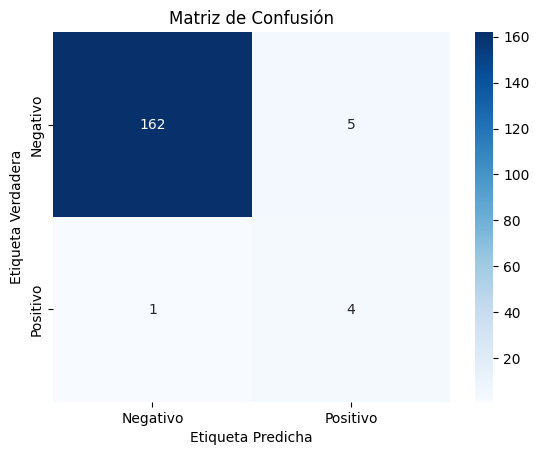

In [ ]:
conf_matrix = [[162, 5],
               [1, 4]]

# Etiquetas de las clases
class_labels = ['Negativo', 'Positivo']

# Crear el mapa de calor con Seaborn
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)

# Añadir etiquetas y título
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')

# Mostrar el mapa de calor
plt.show()

Correlation heat map

<Axes: >

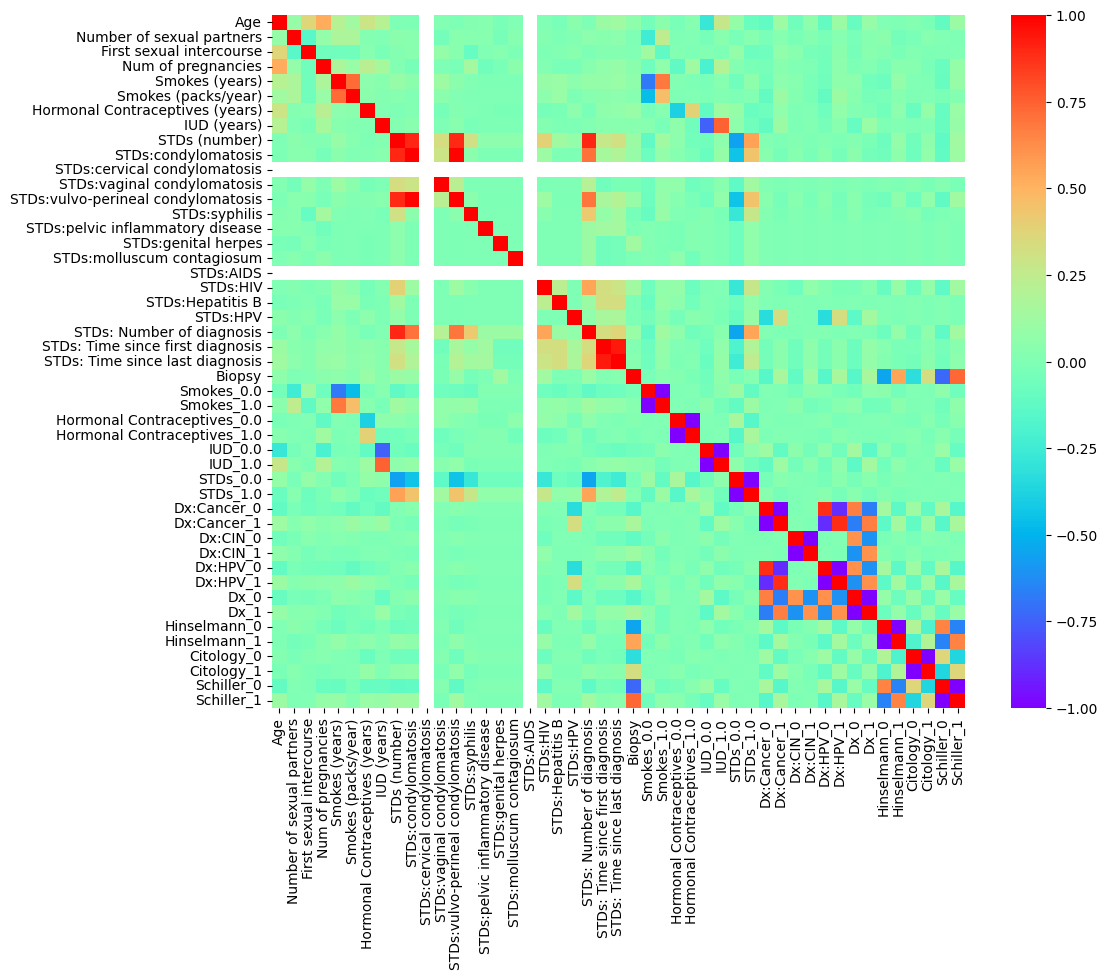

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, cmap='rainbow')

Removing variables

In [ ]:
df_train_feature = df_train[[
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]

train_label = np.array(df_train['Biopsy'])

df_test_feature = df_test[[
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]

test_label = np.array(df_test['Biopsy'])

df_test_feature.head()

,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
727,True,False,False,True,True,False
389,True,False,True,False,True,False
397,True,False,True,False,True,False
564,True,False,True,False,True,False
32,True,False,True,False,True,False


Training model with only Hinselmann, Citology and Schiller

In [ ]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

train_feature = minmax_scale.fit_transform(df_train_feature)
test_feature = minmax_scale.fit_transform(df_test_feature)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(train_feature, train_label)

RandomForestClassifier(random_state=42)

In [ ]:
prediction = random_forest.predict(test_feature)
prediction


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
f1 = f1_score(test_label, prediction)
f1

0.625

auc_roc_score incremented to 98%

In [ ]:
auc_roc = roc_auc_score(test_label, prediction)
auc_roc

0.9820359281437127

In [ ]:
recall = recall_score(test_label, prediction)
recall

1.0

In [ ]:
conf_matrix = confusion_matrix(test_label, prediction)
conf_matrix

array([[161,   6],
       [  0,   5]])

Now there's no false negatives

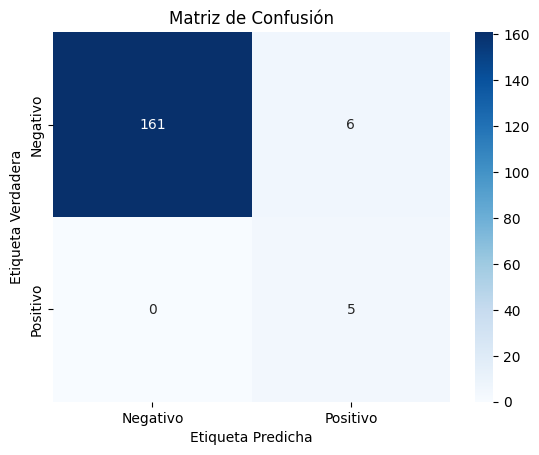

In [ ]:
# Etiquetas de las clases
class_labels = ['Negativo', 'Positivo']

# Crear el mapa de calor con Seaborn
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)

# Añadir etiquetas y título
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')

# Mostrar el mapa de calor
plt.show()